In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import joblib


In [23]:
from tensorflow.keras.datasets import mnist


In [24]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [25]:
x_train.shape

(60000, 28, 28)

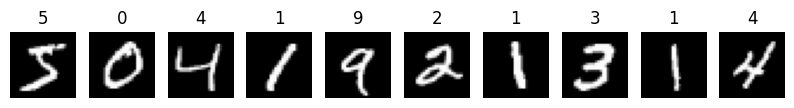

In [26]:
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')  #
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

In [27]:
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

In [28]:
x_train_flat = x_train_flat / 255.0
x_test_flat = x_test_flat / 255.0

In [45]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_neighbors': [1, 3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  
}

In [47]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)


In [ ]:
grid.fit(x_train_flat, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [29]:
knn = KNeighborsClassifier(n_neighbors=3)  # You can tune k
knn.fit(x_train_flat, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [30]:
y_pred = knn.predict(x_test_flat)

In [32]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy = accuracy_score(y_test, y_pred)

In [35]:
accuracy

0.9705

In [37]:
joblib.dump(knn, "knn_mnist.pkl")
print("Model saved as knn_mnist.pkl")

Model saved as knn_mnist.pkl


In [38]:
model = joblib.load("knn_mnist.pkl")


In [39]:
(_, _), (x_test, y_test) = mnist.load_data()
x_test_flat = x_test.reshape(-1, 28*28) / 255.0

In [40]:
indices = np.random.choice(len(x_test), 10, replace=False)
samples = x_test[indices]
samples_flat = x_test_flat[indices]
true_labels = y_test[indices]


In [41]:
predicted_labels = model.predict(samples_flat)

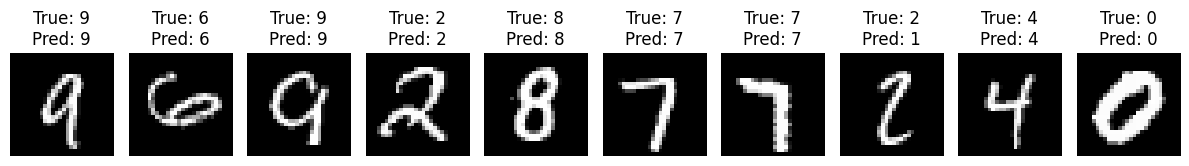

In [42]:
plt.figure(figsize=(12, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(samples[i], cmap="gray")
    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()